# Prepare data

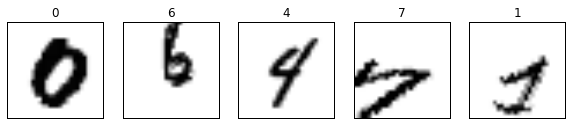

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import numpy as np
import random, os, time

with open("../data/extended4_train.csv") as f:
    training_lines_all = [line for line in f]
    
training_lines = [np.array(line.split(","), dtype='float32') for line in training_lines_all[1:]]

training_images = []
training_labels = []
training_set = []
for line in training_lines:
    one_hot = np.zeros((10), dtype='float32')
    one_hot[int(line[0])] = 1.0
    training_labels.append(one_hot)
    training_images.append(np.array(line[1:], dtype='float32'))
    training_set.append((one_hot, line[1:]))
    
training_images = np.array(training_images)
training_labels = np.array(training_labels)

## See random 5 digit with their labels
random.shuffle(training_set)
fig = plt.figure()
for i, digit in enumerate(training_set[:5]):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(digit[0].nonzero()[0][0])  ## Label
    plt.imshow(digit[1].reshape((28, 28)), cmap=plt.cm.Greys)

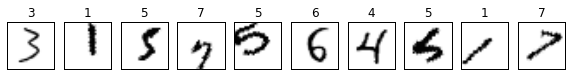

In [2]:
## See random n digit with their labels
n = 10
random.shuffle(training_set)
fig = plt.figure()
for i, digit in enumerate(training_set[:n]):
    plt.subplot(1, n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(digit[0].nonzero()[0][0])  ## Label
    plt.imshow(digit[1].reshape((28, 28)), cmap=plt.cm.Greys)

# Preparing network

In [3]:
from keras import backend as K
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.metrics import categorical_accuracy
from keras.regularizers import l1_l2, l1, l2
from sklearn.utils import shuffle

Couldn't import dot_parser, loading of dot files will not be possible.


Using TensorFlow backend.


### Hyper-parameters

In [7]:
FC_SIZE1 = 128
#FC_SIZE2 = 128
LR = 1e-4
L2_REG = 0.01
EPOCH = 10
BATCH_SIZE = 100
KERNEL_SIZE1 = 3     ## One side (square)
KERNEL_SIZE2 = 3
KERNEL_SIZE3 = 5
KERNEL_SIZE4 = 3
KERNEL_SIZE5 = 3
FEATURE_MAP1 = 32     ## First conv layer feature maps
FEATURE_MAP2 = 32    ## Second conv layer feature maps
FEATURE_MAP3 = 16    ## Third conv layer feature maps
FEATURE_MAP4 = 16
FEATURE_MAP5 = 12
VALIDATION = 0.4
RESTORE = True

MODEL_PATH = "../model/CNN_keras/CNN_keras_5-2.h5"

In [5]:
## Reshape images
if K.image_data_format() == 'channels_first':
    training_images = training_images.reshape(training_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

In [8]:
## Shuffle training set
training_images, training_labels = shuffle(training_images, training_labels, \
                                           random_state=np.random.choice(range(EPOCH)))

if RESTORE and os.path.isfile(MODEL_PATH):
    model = load_model(MODEL_PATH)
    print("Model restored.")
else:
    model = Sequential()
    model.add(Conv2D(FEATURE_MAP1, (KERNEL_SIZE1, KERNEL_SIZE1), activation='relu', input_shape=input_shape))
    model.add(Conv2D(FEATURE_MAP2, (KERNEL_SIZE2, KERNEL_SIZE2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(FEATURE_MAP3, (KERNEL_SIZE3, KERNEL_SIZE3), activation='relu'))
    model.add(Conv2D(FEATURE_MAP2, (KERNEL_SIZE4, KERNEL_SIZE4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(FEATURE_MAP2, (KERNEL_SIZE5, KERNEL_SIZE5), activation='relu'))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(FC_SIZE1, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    sgd = SGD(lr=LR, momentum=0.9, decay=0.0, nesterov=True)
    adam = Adam(lr=LR)
    model.compile(loss='categorical_crossentropy', optimizer=adam, \
                 metrics=[categorical_accuracy])

model.fit(training_images, training_labels, epochs=EPOCH, batch_size=BATCH_SIZE, \
         validation_split=VALIDATION)
model.save(MODEL_PATH)
print("Model saved.")

Model restored.
Train on 100800 samples, validate on 67200 samples
Epoch 1/10
100800/100800 [==============================] - 163s - loss: 0.1794 - categorical_accuracy: 0.9515 - val_loss: 0.1239 - val_categorical_accuracy: 0.9633
Epoch 2/10
100800/100800 [==============================] - 209s - loss: 0.1463 - categorical_accuracy: 0.9600 - val_loss: 0.1132 - val_categorical_accuracy: 0.9669
Epoch 3/10
100800/100800 [==============================] - 196s - loss: 0.1333 - categorical_accuracy: 0.9632 - val_loss: 0.1111 - val_categorical_accuracy: 0.9684
Epoch 4/10
100800/100800 [==============================] - 187s - loss: 0.1220 - categorical_accuracy: 0.9660 - val_loss: 0.1002 - val_categorical_accuracy: 0.9721
Epoch 5/10
100800/100800 [==============================] - 236s - loss: 0.1175 - categorical_accuracy: 0.9678 - val_loss: 0.1108 - val_categorical_accuracy: 0.9688
Epoch 6/10
100800/100800 [==============================] - 209s - loss: 0.1108 - categorical_accuracy: 0.96

### See model summary

In [9]:
MODEL_PATH = "../model/CNN_keras/CNN_keras_5-2.h5"
model = load_model(MODEL_PATH)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 16)          12816     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 6, 6, 32)          4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 1, 1, 32)          9248      
__________

## Prepare test data

In [10]:
with open("../data/test.csv") as f:
	lines = [line for line in f]

test_images = [np.array(line.split(','), dtype='float32') for line in lines[1:]]
test_images = np.array(test_images)

## Reshape images

if K.image_data_format() == 'channels_first':
    test_images = test_images.reshape(test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

# Predict test data

In [11]:
predictions = model.predict(test_images, batch_size=100)
predictions = np.array([np.argmax(i) for i in predictions])

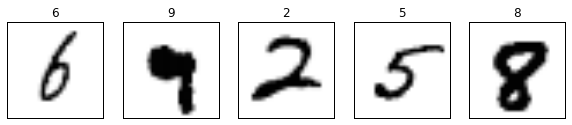

In [16]:
pred_set = zip(test_images, predictions)
## See random 5 digit
random.shuffle(pred_set)
fig = plt.figure()
for i, digit in enumerate(pred_set[:5]):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(digit[1])  ## Prediction
    plt.imshow(digit[0].reshape((28, 28)), cmap=plt.cm.Greys)

In [17]:
## Write to .csv
with open("../data/CNN_keras_submission_5_2.csv", "w") as sub:
    sub.write("ImageId,Label\n")
    for i in xrange(len(predictions)):
        sub.write(str(i + 1) + "," + str(predictions[i]) + "\n")